<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset could be used to predict how loud in decibals an airfoil would be upon approach, takeoff, or while cruising. This would help the engineering team design the quietest possible airplane/shuttle.

- Find out how many rows and columns are in `noise`.

In [8]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [9]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [10]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [11]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

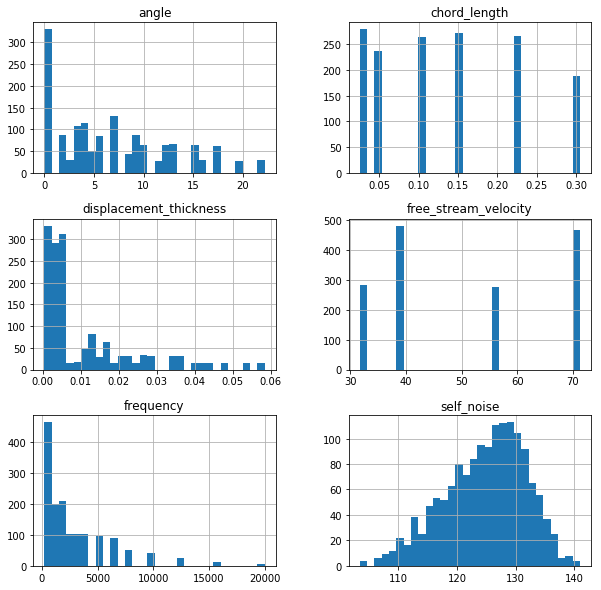

In [18]:
ax = noise.hist(figsize=(10,10), bins = 30)

- Which variables are approximately normally distributed?

Only self_noise is normally distributed. It does have a negative skew, but for our purposes assuming a normal distribution should be ok.

- Which variables show strong skew?

angle of attack, displacement thickness, and frequencey all have a strong positive skew.

- Make a scatterplot of each feature variable with the target variable "self_noise".

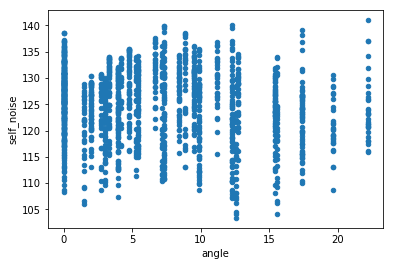

In [19]:
ax2 = noise.plot(kind='scatter', x='angle', y='self_noise')

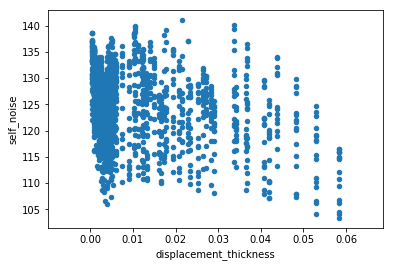

In [20]:
ax3 = noise.plot(kind='scatter', x='displacement_thickness', y='self_noise')

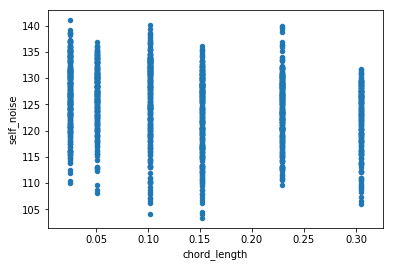

In [21]:
ax4 = noise.plot(kind='scatter', x='chord_length', y='self_noise')

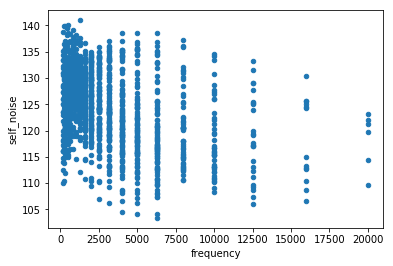

In [22]:
ax5 = noise.plot(kind='scatter', x='frequency', y='self_noise')

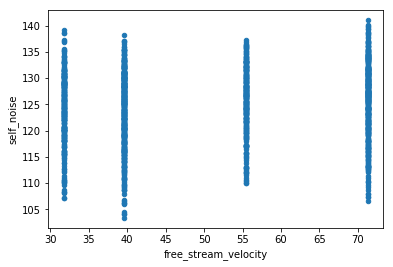

In [23]:
ax6 = noise.plot(kind='scatter', x='free_stream_velocity', y='self_noise')

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

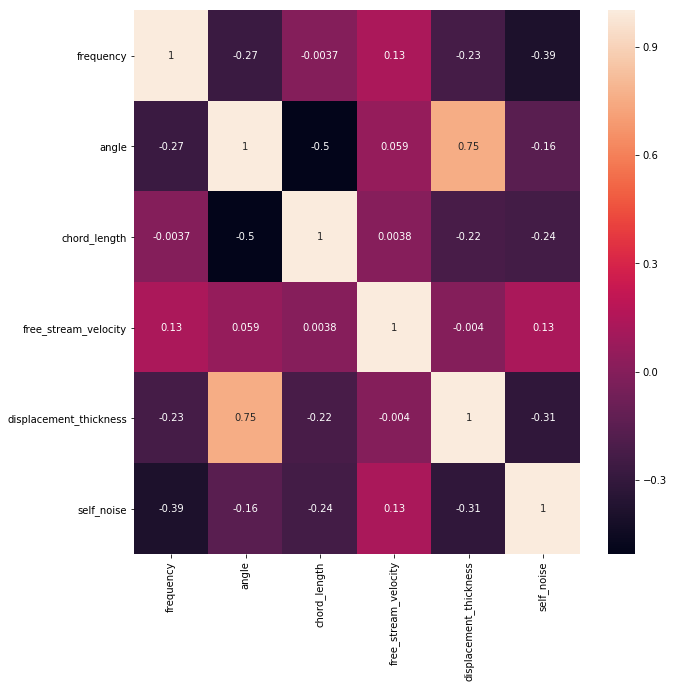

In [26]:
import seaborn as sns

fig, ax7 = plt.subplots(figsize=(10,10))         
sns.heatmap(noise.corr(), annot = True, ax = ax7);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

angle of attack and displacement thickness are highly correlated, so we probably only need one or the other.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_col = 'self_noise'

X = noise.drop(target_col,axis='columns')
y = noise.loc[:,target_col]
print(X.shape,y.shape)

(1503, 5) (1503,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.7, random_state = 1)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Test Data R-Squared:',lr.score(X_test,y_test))
print('Train Data R-Squared:',lr.score(X_train,y_train))

Test Data R-Squared: 0.45563295457081027
Train Data R-Squared: 0.5918971594506313


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The first run performed ~60% better than the null model on the training set and ~45% better on the test set. The model performed poorly on the training set so it has high variance.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed better on the training set than on the test set, so it's overfitting.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

That's hard to say. I'm not sure how high the r squared can get with the data provided, but I would start by trying to reduce variance first, because I don't see any value in reducing the bias if the end result is a model that has an r squared of .455.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

print('Test Data R-Squared:',rfr.score(X_test,y_test))
print('Train Data R-Squared:',rfr.score(X_train,y_train))

Test Data R-Squared: 0.8129135336816198
Train Data R-Squared: 0.9819217825196155


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The random forest performed much better than the linear regression model. This suggests that the relationship between the target variable and one or more feature variables isn't linear.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [44]:
from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_true, y_pred):
    mse = np.square(y_true - y_pred).mean()
    return -np.sqrt(mse)

neg_rmse = make_scorer(neg_rmse)

In [54]:
from sklearn.model_selection import GridSearchCV, KFold
max_features_range = list(range(1, len(feature_col)+1))
kf = KFold(5, shuffle=True, random_state=1)
feature_col = X.columns
max_depth_range = list(range(1, 6))


grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100, random_state=1),
                    param_grid={'max_features': max_features_range},
                    cv=kf,
                    scoring=neg_rmse,
                    return_train_score=True,
                   )
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(neg_rmse), verbose=0)

In [56]:
rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(6)]]
scores = rmse_df.sum(axis='columns')
scores

0    10.154398
1     8.978967
2     8.632742
3     8.672861
4     8.684473
dtype: float64

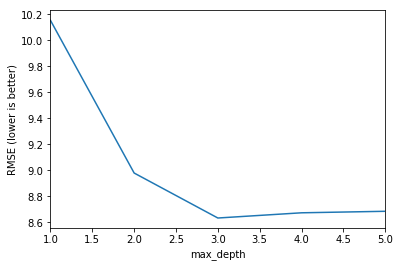

In [58]:
scores.index = max_depth_range

ax = scores.plot()
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

In [78]:
rfr = RandomForestRegressor(n_estimators=100, max_features=3,max_depth = 15)
rfr.fit(X_train,y_train)

print('Test Data R-Squared:',rfr.score(X_test,y_test))
print('Train Data R-Squared:',rfr.score(X_train,y_train))

Test Data R-Squared: 0.8214506799867244
Train Data R-Squared: 0.9814029132496903


In [70]:
kf = KFold(5, shuffle=True, random_state=1)
n_estimators_range = range(1,100)

grid = GridSearchCV(estimator=RandomForestRegressor(max_features = 3, random_state=1),
                    param_grid={'n_estimators': n_estimators_range},
                    cv=kf,
                    scoring=neg_rmse,
                    return_train_score=True,
                   )
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=make_scorer(neg_rmse),
       verbose=0)

In [71]:
rmse_df = -pd.DataFrame(grid.cv_results_).loc[:, [f'split{i}_test_score' for i in range(6)]]
scores = rmse_df.sum(axis='columns')
scores

C:\Users\Will Nichols\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


0     16.544622
1     12.576688
2     11.576000
3     10.943136
4     10.500217
5     10.170274
6      9.977848
7      9.949599
8      9.809295
9      9.622652
10     9.576830
11     9.543517
12     9.508809
13     9.396311
14     9.415489
15     9.427978
16     9.414179
17     9.381757
18     9.356590
19     9.295878
20     9.288851
21     9.249358
22     9.215163
23     9.228918
24     9.221908
25     9.197729
26     9.170365
27     9.157079
28     9.118922
29     9.083564
        ...    
69     8.744829
70     8.742863
71     8.720236
72     8.720346
73     8.717576
74     8.723891
75     8.713352
76     8.713004
77     8.713922
78     8.706862
79     8.694875
80     8.693124
81     8.696569
82     8.691004
83     8.688319
84     8.681860
85     8.679309
86     8.682465
87     8.683740
88     8.672141
89     8.673027
90     8.670427
91     8.658235
92     8.646477
93     8.641995
94     8.642673
95     8.648268
96     8.650544
97     8.634068
98     8.634613
Length: 99, dtype: float

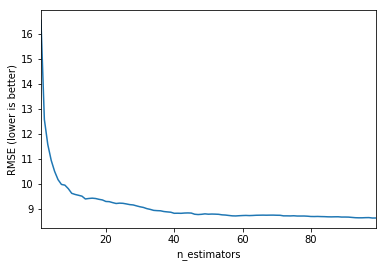

In [74]:
scores.index = n_estimators_range

ax = scores.plot()
ax.set_xlabel('n_estimators');
ax.set_ylabel('RMSE (lower is better)');

I used GridSearchCV to find the optimal values for n_estimators and max_features. I couldn't get the r squared value up from the first random forest run, because the defaults that were used were already sufficient. I could have used GridSearchCV for max_depth as well, but instead I came to 15 by trial and error.

If I had tried to improve the linear regression model, I would start by transforming some of the feature columns. I didn't go that route, because the nonlinear relationship that is present between the feature columns and the target column wasn't quickly appaerent to me when i inspected the scatter plots.

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The dataset contains credit information that can be used to determine whether or not someone should be issued a credit card based on based on attribur=tes that have been stripped of their names.

In [167]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [168]:
credit.shape

(690, 16)

In [177]:
credit.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

- Find out what data types are present.

In [173]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14      int32
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [196]:
question = credit[credit[2]=='?'].index

credit.drop(question,inplace=True)



In [171]:
question14 = credit[credit[14]=='?'].index

credit.drop(question14,inplace=True)


In [191]:
credit.loc[:,14] = credit.loc[:,14].astype(int)


In [198]:
credit.loc[:,2].value_counts()
credit.loc[:,2] = credit.loc[:,2].astype(float)

- Find out how many null values there are in each columns.

In [84]:
credit.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [203]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,654,654.000000,654.000000,654,654,654,654,654.000000,654,654,654.000000,654,654,654.000000,654.000000,654
unique,2,NaN,NaN,3,3,15,10,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,451,NaN,NaN,500,500,133,381,NaN,350,367,NaN,352,599,NaN,NaN,358
mean,NaN,31.578349,4.830558,NaN,NaN,NaN,NaN,2.241690,NaN,NaN,2.498471,NaN,NaN,180.084098,1012.730887,NaN
std,NaN,11.981789,5.023295,NaN,NaN,NaN,NaN,3.369197,NaN,NaN,4.965655,NaN,NaN,168.315719,5249.320660,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.580000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,70.750000,0.000000,NaN
50%,NaN,28.460000,2.855000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.250000,7.437500,NaN,NaN,NaN,NaN,2.615000,NaN,NaN,3.000000,NaN,NaN,271.000000,399.000000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

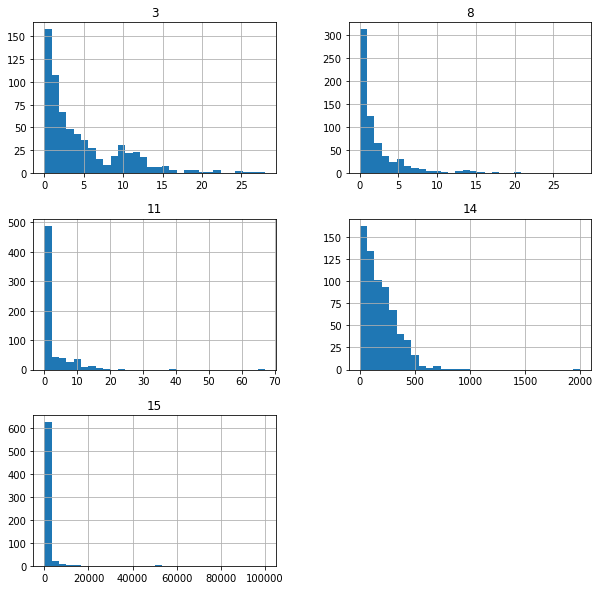

In [175]:
ax = credit.hist(figsize=(10,10), bins = 30)

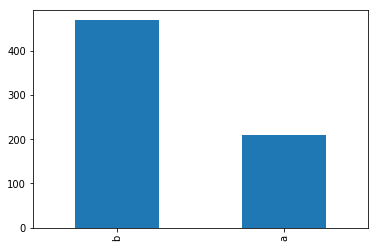

In [124]:
ax2 = credit.loc[:, 1].value_counts().plot(kind='bar')

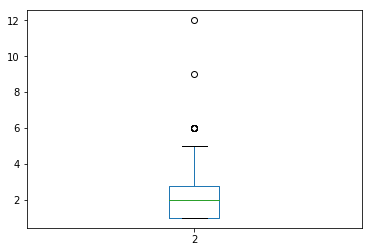

In [125]:
ax2 = credit.loc[:, 2].value_counts().plot(kind='box')

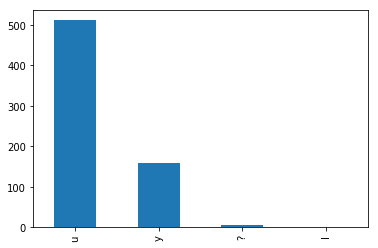

In [119]:
ax2 = credit.loc[:, 4].value_counts().plot(kind='bar')

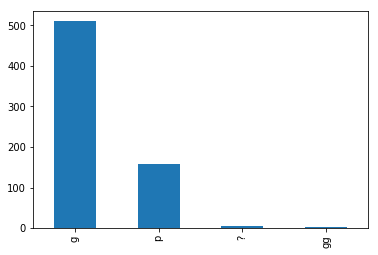

In [126]:
ax2 = credit.loc[:, 5].value_counts().plot(kind='bar')

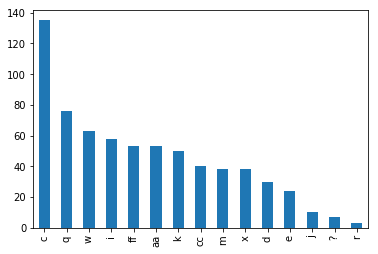

In [127]:
ax2 = credit.loc[:, 6].value_counts().plot(kind='bar')

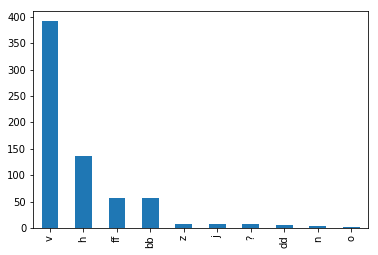

In [128]:
ax2 = credit.loc[:, 7].value_counts().plot(kind='bar')

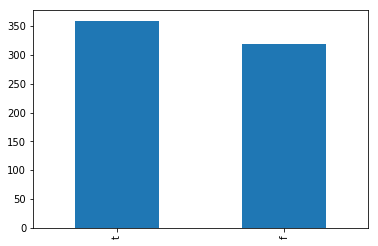

In [129]:
ax2 = credit.loc[:, 9].value_counts().plot(kind='bar')

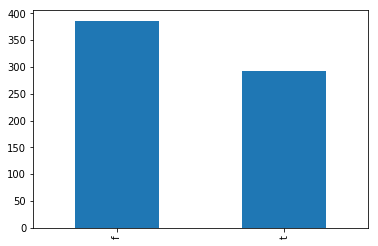

In [130]:
ax2 = credit.loc[:, 10].value_counts().plot(kind='bar')

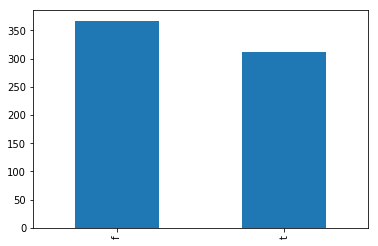

In [132]:
ax2 = credit.loc[:, 12].value_counts().plot(kind='bar')

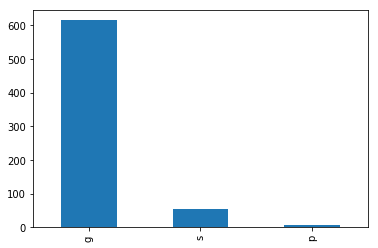

In [133]:
ax2 = credit.loc[:, 13].value_counts().plot(kind='bar')

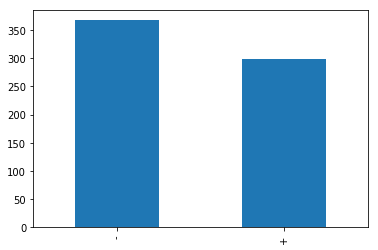

In [176]:
ax2 = credit.loc[:, 16].value_counts().plot(kind='bar')

- Which variables are approximately normally distributed?

none of the numeric columns are normally distributed. The categorical columns 9,10, and 11 are pretty close to being normal.

- Which variables show strong skew?

all of them except the three mentioned above

- Make a scatterplot of each feature variable with the target variable (`16`).

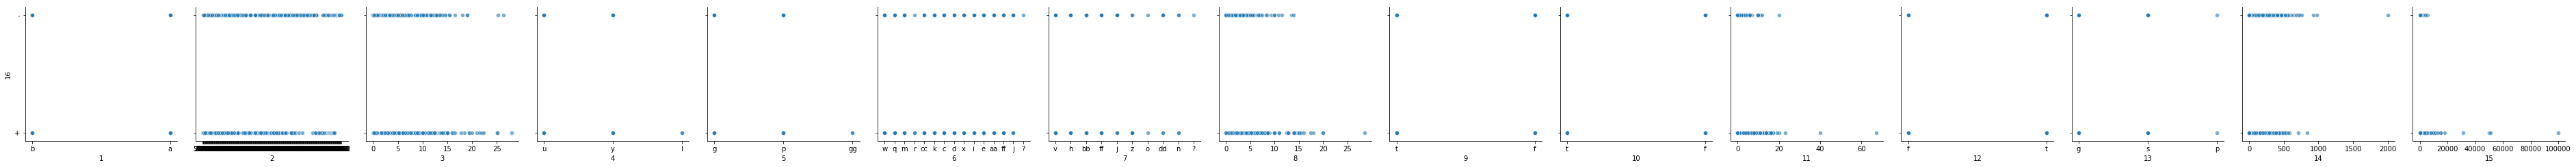

In [178]:
g = sns.pairplot(data=credit,
                x_vars=credit.drop(16,axis='columns').columns,
                 y_vars = [16],
                 plot_kws={'alpha':.6},
                 height=3.5,)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

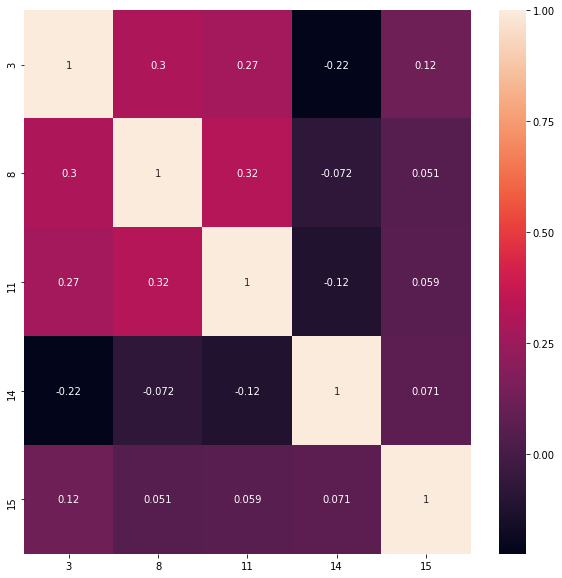

In [179]:
fig, ax7 = plt.subplots(figsize=(10,10))         
sns.heatmap(credit.corr(), annot = True, ax = ax7);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

I don't see anything that concerns me at this point

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [180]:
credit.loc[:, 16].value_counts()

-    367
+    298
Name: 16, dtype: int64

The null model would be correct 367 times out of 665 or ~55% of the time.

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [205]:
cat_cols = credit.loc[:,credit.dtypes == 'object'].columns
cat_cols

Int64Index([1, 4, 5, 6, 7, 9, 10, 12, 13, 16], dtype='int64')

In [ ]:
credit = pd.get_dummies(credit,cat_cols, drop_first=True)

In [226]:
target_col = '16_-'

X = credit.drop(target_col,axis='columns')
y = credit.loc[:,target_col]
print(X.shape,y.shape)

(654, 39) (654,)


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.7, random_state = 1)

In [230]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()
lr2.fit(X_train,y_train)

print('Test Data R-Squared:',lr2.score(X_test,y_test))
print('Train Data R-Squared:',lr2.score(X_train,y_train))

Test Data R-Squared: 0.8537117903930131
Train Data R-Squared: 0.9183673469387755


C:\Users\Will Nichols\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

It performed ~30% better than the null model

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The score on the training set was much better than the test set which means the model has an over fitting bias.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say it has more of a bias problem since the r score on the test set was pretty good.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [229]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

print('Test Data R-Squared:',rfc.score(X_test,y_test))
print('Train Data R-Squared:',rfc.score(X_train,y_train))

Test Data R-Squared: 0.8668122270742358
Train Data R-Squared: 1.0


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

the random forest has more of a bias problem than the logistic regression, but the variance is very similar.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [250]:
rfc = RandomForestClassifier(n_estimators=100, max_features=10, max_depth = 2)
rfc.fit(X_train,y_train)

print('Test Data R-Squared:',rfc.score(X_test,y_test))
print('Train Data R-Squared:',rfc.score(X_train,y_train))

Test Data R-Squared: 0.8668122270742358
Train Data R-Squared: 0.8979591836734694


The score on the test set isn't any different, but I was able to decrease bias.

- **BONUS:** Keep going! Find ways to make your model better.